<a href="https://colab.research.google.com/github/aioshi21chowdhury/offensive_lang_detection/blob/main/offensive_audio__detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install SpeechRecognition


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 65.0 MB/s eta 0:00:00


#wrong code just testing ❌

In [ ]:
import random

# List of offensive words
offensive_words = [
    "badword1", "badword2", "bitch", "bastard", "asshole", "dickhead", "motherfucker", "cunt",
    "fuck", "shit", "damn", "slut", "whore", "idiot", "stupid", "moron", "douchebag", "prick",
    "fag", "faggot", "paki", "chutiya", "gandu", "launda", "madarchod", "behenchod", "randi",
    "chamaar", "naalayak", "kamina", "kameena", "bhadwa", "tharki", "budhhi", "jhoota", "khota",
    "gandagi", "pullu", "gaandu", "bhenji", "bhens ki aankh", "madrasi", "gora", "bheja fry",
    "saala", "behen ki izzat", "kutta", "saala kutta", "kutta saala", "madrasi fucker", "chutiya",
    "garbage", "cockroach", "ass", "bollocks", "bimbo", "shithead", "bastardo", "fucker", "sissy",
    "queer", "troll", "scumbag", "loser", "twat", "piss", "dick", "prick", "pussy", "wanker", "arsehole"
]

# List of clean non-offensive sentences
non_offensive_sentences = [
    "I love reading books.", "It's a beautiful day outside.", "I am feeling happy today.",
    "This is a wonderful experience.", "I enjoy learning new things.", "The weather is nice today.",
    "I had a great meal.", "Let's go for a walk.", "I am proud of my achievements.", "You did a great job!",
    "Life is full of opportunities.", "Let's have a fun time together.", "I am learning to be more positive.",
    "It's a peaceful afternoon.", "I appreciate your help.", "I feel good about my progress.",
    "Let's explore new places.", "I love spending time with friends.", "It's great to see you!",
    "I am grateful for everything I have.", "Life is beautiful.", "Today is a new day to start fresh.",
    "Everything is going well.", "I feel great energy today.", "I’m ready to take on the world today."
]

# Function to generate offensive sentences
def generate_offensive_sentence():
    sentence = f"This is such a {random.choice(offensive_words)} situation."
    return sentence

# Generate the dataset
dataset = []

# Adding 100 non-offensive sentences
for sentence in non_offensive_sentences:
    dataset.append([sentence, 0])  # 0 represents non-offensive

# Adding 100 offensive sentences
for _ in range(100):
    offensive_sentence = generate_offensive_sentence()
    dataset.append([offensive_sentence, 1])  # 1 represents offensive

# Shuffle the dataset to mix offensive and non-offensive sentences
random.shuffle(dataset)

# Convert the dataset into a pandas DataFrame
import pandas as pd
df = pd.DataFrame(dataset, columns=["sentence", "label"])

# Save the dataset to a CSV file
df.to_csv("offensive_sentiment_dataset.csv", index=False)

# Show the first few rows of the dataset
print(df.head())


                              sentence  label
0  This is such a cockroach situation.      1
1       This is such a piss situation.      1
2     This is such a wanker situation.      1
3       This is such a cunt situation.      1
4   This is such a badword1 situation.      1


In [ ]:
import speech_recognition as sr
import re
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Audio to text conversion using SpeechRecognition
def audio_to_text(audio_file):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        return "Could not understand audio"
    except sr.RequestError:
        return "API request failed"

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Function to classify text
def classify_offensive(text, model, vectorizer):
    text_cleaned = clean_text(text)
    vectorized_text = vectorizer.transform([text_cleaned])
    prediction = model.predict(vectorized_text)
    return prediction[0]

# Load the dataset from Excel
file_path = "final_balanced_dataset.csv"  # Replace with the path to your Excel file
df = pd.read_csv(file_path)

# Assuming the Excel sheet has two columns: 'Sentence' and 'Label'
# 'Sentence' contains the text, and 'Label' contains 0 (non-offensive) or 1 (offensive)
train_data = df['tweet'].tolist()
train_labels = df['binary_label'].tolist()

# Preprocess text data
train_data_cleaned = [clean_text(text) for text in train_data if isinstance(text, str)]



# Convert back to list
train_data_cleaned = list(train_data_cleaned)
y = list(y)


# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_data_cleaned)
y = train_labels

# Train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Linear SVM': LinearSVC()
}

# Train models
for model_name, model in models.items():
    model.fit(X, y)

# Test with an actual audio file
audio_file = "output.wav"  # Replace with the path to your audio file

# Convert audio to text
text = audio_to_text(audio_file)
print(f"Transcribed Text: {text}")

# Classify the text using all models
for model_name, model in models.items():
    prediction = classify_offensive(text, model, vectorizer)
    print(f"{model_name} Prediction: {'Offensive' if prediction == 1 else 'Non-Offensive'}")


ValueError: Found input variables with inconsistent numbers of samples: [15279, 15280]

In [ ]:
!pip install matplotlib seaborn scikit-learn


In [ ]:
import speech_recognition as sr
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Audio to text conversion using SpeechRecognition
def audio_to_text(audio_file):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        return "Could not understand audio"
    except sr.RequestError:
        return "API request failed"

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Function to classify text
def classify_offensive(text, model, vectorizer):
    text_cleaned = clean_text(text)
    vectorized_text = vectorizer.transform([text_cleaned])
    prediction = model.predict(vectorized_text)
    return prediction[0]

# Load the dataset from Excel
file_path = "final_balanced_dataset.csv"  # Replace with the path to your Excel file
df = pd.read_csv(file_path)

# Assuming the Excel sheet has two columns: 'Sentence' and 'Label'
# 'Sentence' contains the text, and 'Label' contains 0 (non-offensive) or 1 (offensive)
train_data = df['tweet'].tolist()
train_labels = df['binary_label'].tolist()

# Preprocess text data
train_data_cleaned = [clean_text(text) for text in train_data]

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_data_cleaned)
y = train_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Linear SVM': LinearSVC()
}

# Dictionary to store the models' results
results = {}

# Train models and calculate performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store accuracy, f1 score, and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    cm = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm
    }

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Accuracy of Each Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Plot the F1-score graph
plt.figure(figsize=(10, 6))
f1_scores = [results[model]['f1_score'] for model in model_names]
plt.bar(model_names, f1_scores, color='salmon')
plt.title('F1-score of Each Model')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.show()

# Plot confusion matrices for each model
for model_name, result in results.items():
    cm = result['confusion_matrix']
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Offensive', 'Offensive'], yticklabels=['Non-Offensive', 'Offensive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


KeyError: 'sentence'

#process the data

In [ ]:
import pandas as pd

# Load your CSV
df = pd.read_csv('Hate and offensive speech detection.csv')  # Replace with your filename

# Check original label distribution
print("Original label counts:\n", df['label'].value_counts())

# Convert labels to binary
df['binary_label'] = df['label'].apply(lambda x: 1 if x in [1, 2] else 0)

# Check new label distribution
print("\nNew binary label counts:\n", df['binary_label'].value_counts())

# Save the new dataframe if needed
df.to_csv('binary_labeled_data.csv', index=False)


Original label counts:
 label
3    13366
2     5504
1     2139
Name: count, dtype: int64

New binary label counts:
 binary_label
0    13366
1     7643
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the main dataset
main_df = pd.read_csv('binary_labeled_data.csv')

# Split into offensive and non-offensive
offensive_df = main_df[main_df['binary_label'] == 1]
non_offensive_df = main_df[main_df['binary_label'] == 0]

# Count samples
n_offensive = len(offensive_df)
n_non_offensive = len(non_offensive_df)

print(f"Original counts -> Offensive: {n_offensive}, Non-Offensive: {n_non_offensive}")

# === Case 1: You already have augmented offensive data
try:
    augmented_df = pd.read_csv('augmented_offensive.csv')
    offensive_df = pd.concat([offensive_df, augmented_df], ignore_index=True)
    print(f"After augmentation, offensive count: {len(offensive_df)}")
except:
    print("No augmented data found. Continuing without augmentation.")

# Make both classes equal
min_count = min(len(offensive_df), len(non_offensive_df))

# Downsample both to the smaller count
offensive_balanced = offensive_df.sample(n=min_count, random_state=42)
non_offensive_balanced = non_offensive_df.sample(n=min_count, random_state=42)

# Combine and shuffle
final_balanced_df = pd.concat([offensive_balanced, non_offensive_balanced]).sample(frac=1, random_state=42).reset_index(drop=True)

# Check distribution
print("Balanced class distribution:\n", final_balanced_df['binary_label'].value_counts())

# Save to new CSV
final_balanced_df.to_csv('final_balanced_dataset.csv', index=False)


Original counts -> Offensive: 7643, Non-Offensive: 13366
No augmented data found. Continuing without augmentation.
Balanced class distribution:
 binary_label
0    7643
1    7643
Name: count, dtype: int64


In [ ]:
main_df.head()

,username,tweet,label,binary_label
0,@zhero_mochoge,Say that Loud!,3,0
1,@foodiegiirl,My heart aches for those who've lost their lov...,3,0
2,@ayeshakhan2200,bitter truth,3,0
3,@Jawwad_94,The people of Gaza deserve a life free from fe...,3,0
4,@EuphoricIshriii,"Oh allah, grant your divine assistance to the ...",3,0


In [ ]:
# prompt: one line code to drop the username column and label column from the table and save it to final_balanced_dataset.csv

import pandas as pd
df = pd.read_csv('final_balanced_dataset.csv').drop(['username', 'label'], axis=1)
df.to_csv('final_balanced_dataset.csv', index=False)


In [ ]:
df.head()

,tweet,binary_label
0,sometimes i check up on limbus ao3 to see if a...,0
1,stands for Lady Gaga being the Queen LGBTQ,0
2,There’s a group of Southern Baptist / Southern...,1
3,A bit of a rank performance BUT no one below u...,0
4,"rep ""22” and i'll give you:\n\n✶ cool and chil...",0


#clean code

In [ ]:
!pip install SpeechRecognition

In [ ]:
!pip install matplotlib seaborn scikit-learn


Data Head:
                                               tweet  Unnamed: 1  binary_label
0  sometimes i check up on limbus ao3 to see if a...         NaN             0
1        stands for Lady Gaga being the Queen LGBTQ          NaN             0
2  There’s a group of Southern Baptist / Southern...         NaN             1
3  A bit of a rank performance BUT no one below u...         NaN             0
4  rep "22” and i'll give you:\n\n✶ cool and chil...         NaN             0

Model: Logistic Regression
Accuracy: 0.7411649214659686
F1 Score: 0.7323181049069374
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1557
           1       0.74      0.72      0.73      1499

    accuracy                           0.74      3056
   macro avg       0.74      0.74      0.74      3056
weighted avg       0.74      0.74      0.74      3056



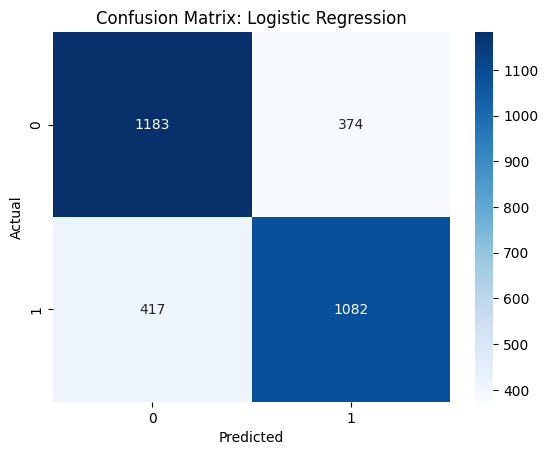


Model: Naive Bayes
Accuracy: 0.7231675392670157
F1 Score: 0.736284289276808
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1557
           1       0.69      0.79      0.74      1499

    accuracy                           0.72      3056
   macro avg       0.73      0.72      0.72      3056
weighted avg       0.73      0.72      0.72      3056



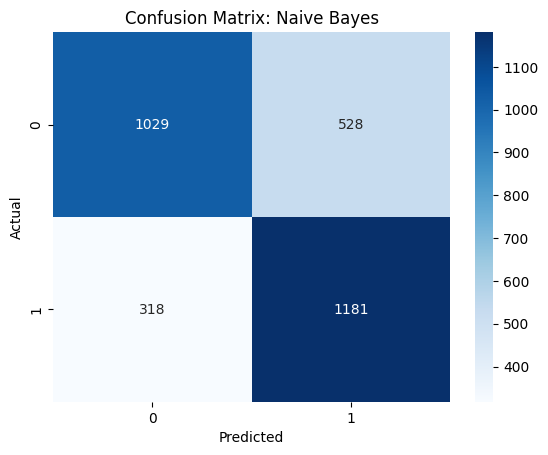


Model: Linear SVM
Accuracy: 0.7274214659685864
F1 Score: 0.7192450286484665
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74      1557
           1       0.73      0.71      0.72      1499

    accuracy                           0.73      3056
   macro avg       0.73      0.73      0.73      3056
weighted avg       0.73      0.73      0.73      3056



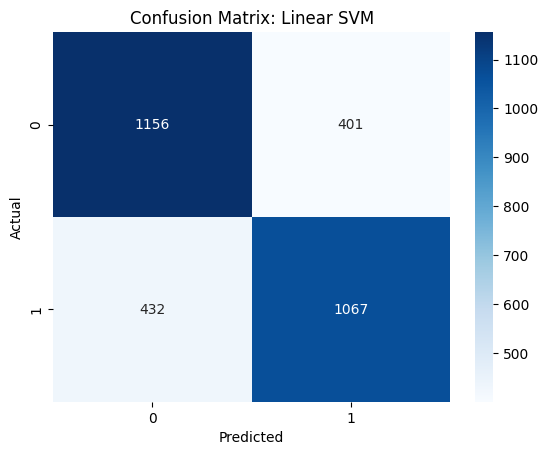


Model: Random Forest
Accuracy: 0.7545811518324608
F1 Score: 0.7532894736842105
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1557
           1       0.74      0.76      0.75      1499

    accuracy                           0.75      3056
   macro avg       0.75      0.75      0.75      3056
weighted avg       0.75      0.75      0.75      3056



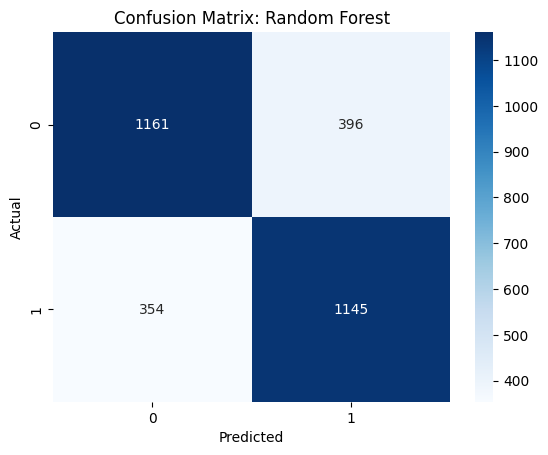

In [ ]:
import pandas as pd
import re
import numpy as np
import pickle
import os
import speech_recognition as sr

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and preview data
df = pd.read_csv("final_balanced_dataset.csv")
print("Data Head:")
print(df.head())

# Step 2: Text cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['cleaned'] = df['tweet'].apply(clean_text)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['binary_label'], test_size=0.2, random_state=42)

# Step 4: TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 6: Save best model and vectorizer (example: Logistic Regression)
best_model = models["Logistic Regression"]
with open("offensive_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


<ipython-input-26-d5b60bb718ca>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=scores, palette="viridis")


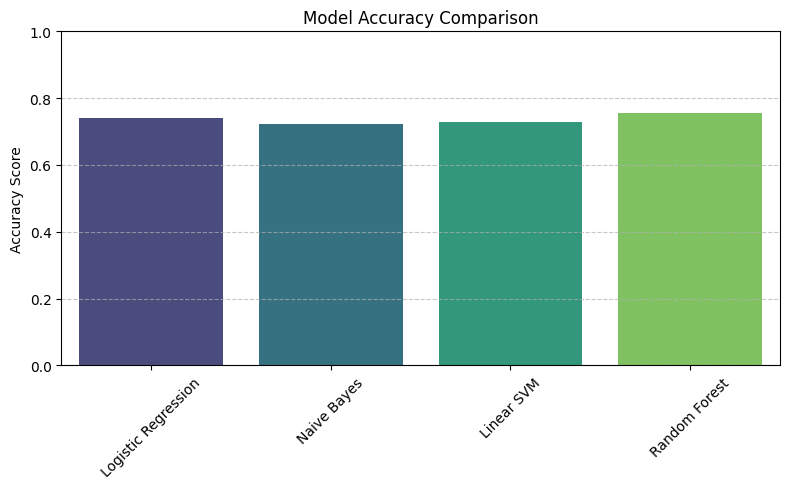

In [ ]:
# Collect accuracy scores for visualization
accuracy_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc

# Plot accuracy graph
plt.figure(figsize=(8, 5))
model_names = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

sns.barplot(x=model_names, y=scores, palette="viridis")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Load saved model and vectorizer
with open("offensive_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

# Function: Convert audio to text
def audio_to_text(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.record(source)
    try:
        return recognizer.recognize_google(audio)
    except sr.UnknownValueError:
        return "Could not understand audio"
    except sr.RequestError:
        return "API request failed"

# Function: Classify the text
def classify_audio_text(audio_path):
    text = audio_to_text(audio_path)
    print("Transcribed Text:", text)
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    pred = model.predict(vectorized)[0]
    print("Prediction:", "Offensive" if pred == 1 else "Non-Offensive")

# Test with audio file
audio_file = "test4.wav"  # Replace with actual .wav path
if os.path.exists(audio_file):
    classify_audio_text(audio_file)
else:
    print("Audio file not found.")


Transcribed Text: how dare you to do this kind of shit work
Prediction: Non-Offensive


In [ ]:
# Function: Convert audio to text
def audio_to_text(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.record(source)
    try:
        return recognizer.recognize_google(audio)
    except sr.UnknownValueError:
        return "Could not understand audio"
    except sr.RequestError:
        return "API request failed"

# Function: Classify the text
def classify_audio_text(audio_path):
    text = audio_to_text(audio_path)
    print("Transcribed Text:", text)
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    pred = model.predict(vectorized)[0]
    print("Prediction:", "Offensive" if pred == 1 else "Non-Offensive")

# Test with audio file
audio_file = "test3.wav"  # Replace with actual .wav path
if os.path.exists(audio_file):
    classify_audio_text(audio_file)
else:
    print("Audio file not found.")

Transcribed Text: lol I am happy to see you that you can't do this even
Prediction: Non-Offensive


In [ ]:
# Function: Convert audio to text
def audio_to_text(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.record(source)
    try:
        return recognizer.recognize_google(audio)
    except sr.UnknownValueError:
        return "Could not understand audio"
    except sr.RequestError:
        return "API request failed"

# Function: Classify the text
def classify_audio_text(audio_path):
    text = audio_to_text(audio_path)
    print("Transcribed Text:", text)
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    pred = model.predict(vectorized)[0]
    print("Prediction:", "Offensive" if pred == 1 else "Non-Offensive")

# Test with audio file
audio_file = "output.wav"  # Replace with actual .wav path
if os.path.exists(audio_file):
    classify_audio_text(audio_file)
else:
    print("Audio file not found.")

Transcribed Text: fuck you bitch
Prediction: Offensive
